# <center> Bank Customers Churn Analysis </center>

### Term Project Milestone 3: Model Building and Evaluation

In [2]:
#preparing data

#Importing data
import pandas as pd
df = pd.read_csv("Churn Modeling.csv")

#removing unnecessary features
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

#separating input and output features
X = df.drop('Exited', axis = 1)
y = df['Exited']

#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

#transforming age variable by taking log
import numpy as np
X_train['log_age'] = np.log1p(X_train['Age'])
X_test['log_age'] = np.log1p(X_test['Age'])

#dropping original age variable from train and test data
X_train.drop('Age', axis = 1, inplace = True)
X_test.drop('Age', axis = 1, inplace = True)

#creating dummy variables for both training and test data
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [3]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [4]:
#instantiating decision tree model
dt_mod = DecisionTreeClassifier()
#fitting decision tree model on training data
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier()

Model Accuracy: 79.4 %


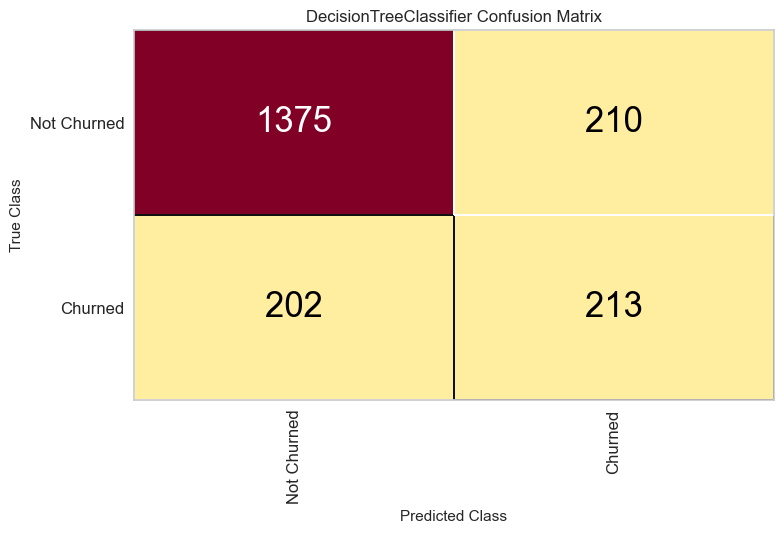

In [5]:
#accuracy and confusion matrix
import warnings
warnings.filterwarnings('ignore')
label_encoder = {0: "Not Churned", 1: "Churned"}
cm = ConfusionMatrix(dt_mod, encoder = label_encoder, percent = False)

#fit th test set to the confusion matrix
cm.fit(X_test, y_test)

#accuracy
acc = 100 * cm.score(X_test, y_test)
print("Model Accuracy:", round(acc, 2), '%', sep = ' ')

#change the font size of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)
cm.show();

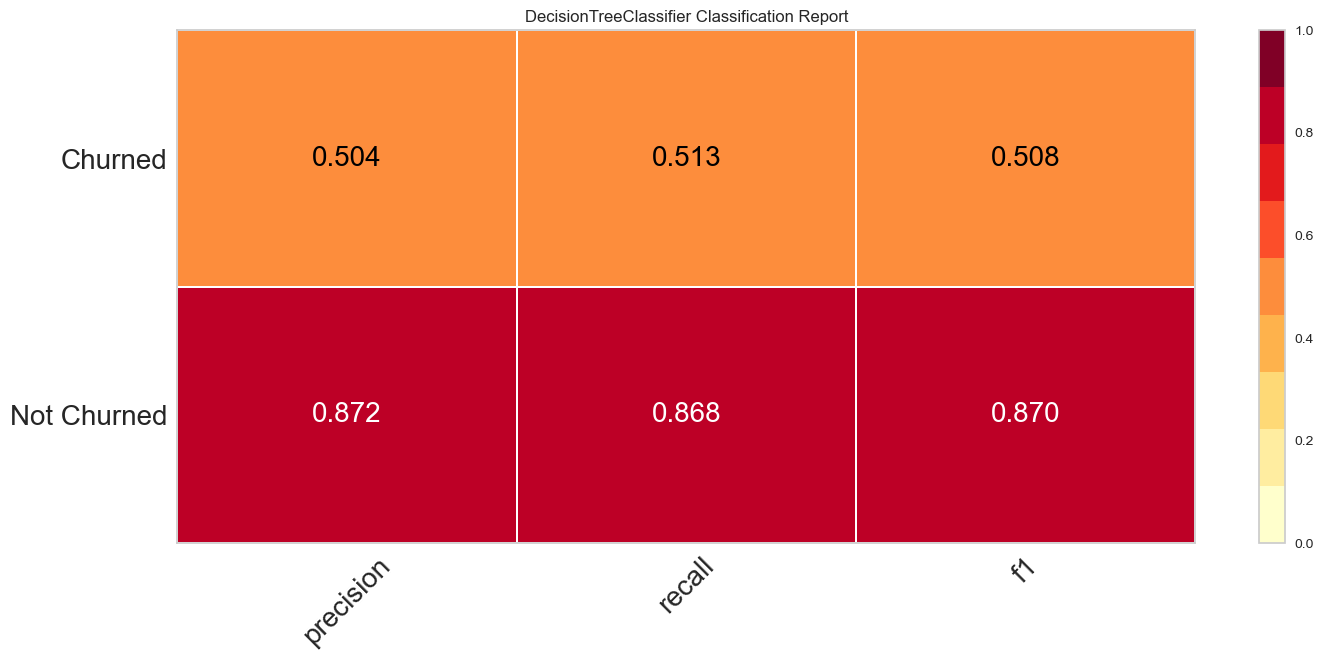

In [7]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(dt_mod, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show();

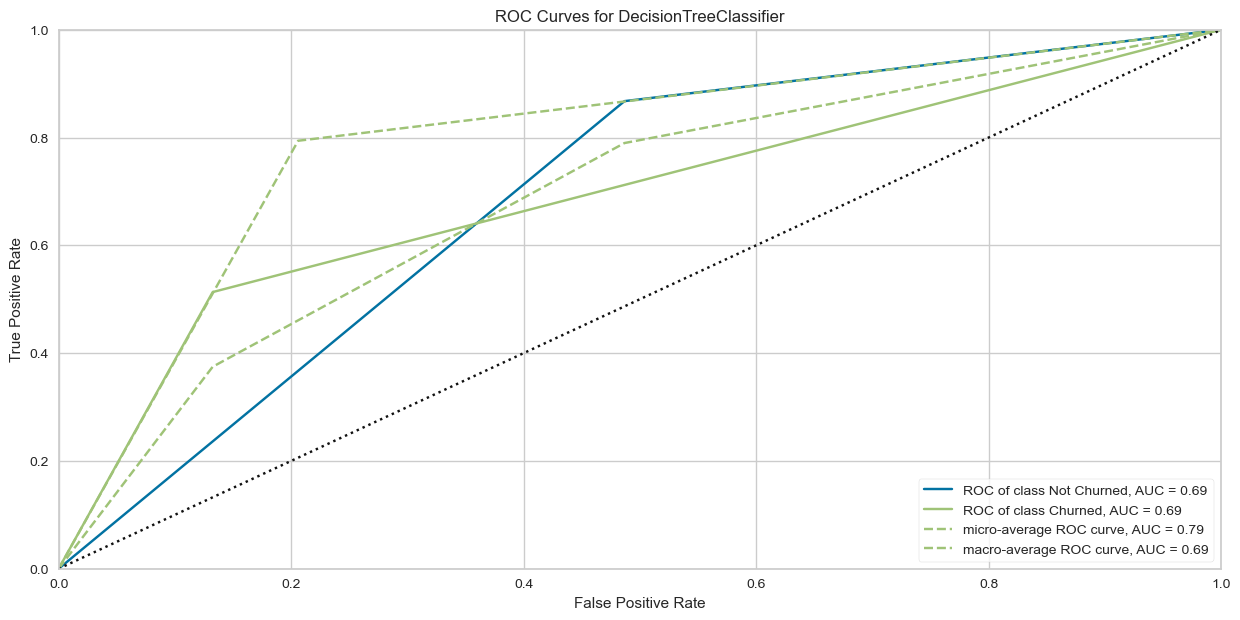

In [8]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(dt_mod, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show();

##### Conclusions
- Geography and Age plays an important role for predicting if a customer churned out or not.
- Decision Tree model predicts customers churn with approximat 80% accuracy.
- Classification Report and ROC curve suggests that model has strong predicive power.
- Age, Has Credit Card, Geography, Balance and Number of Products are useful for predicting wheter the customer will churn or not.